In [ ]:
#First we must download and upload the csv file for the dataset into Jupyter.
#From there we can call the dataset from Python and use a pandas function to read tabular data as a Dataframe object

#Let's read the csv file into a pandas dataframe and call the resulting dataframe table.

import pandas as pd 
table = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (2).csv')

#We can display the dataset now by simply typing table. 
table




In [ ]:
#In order to properly view the table, we need to clean up the table by removing unecessary columns from the Dataframe.

list(table)  #displays the column vectors in the Dataframe

del table['YearStart']
del table['YearEnd']
del table['LocationAbbr']
del table['Datasource']
del table['Data_Value_Unit']
del table['Data_Value_Type']
del table['Data_Value_Alt']
del table['Data_Value_Footnote_Symbol']
del table['Data_Value_Footnote']
del table['GeoLocation']
del table['ClassID']
del table['TopicID']
del table['QuestionID']
del table['DataValueTypeID']
del table['LocationID']
del table['StratificationCategory1']
del table['Stratification1']
del table['StratificationCategoryId1']
del table['StratificationID1']

#Also before diplaying the table, we can rename some of the columns of the Dataframe so that they have a better description

table=table.rename(columns = {'LocationDesc': 'State'})
table=table.rename(columns = {'Data_Value': 'Data'})
table=table.rename(columns = {'Class': 'Class of Question'})
table=table.rename(columns = {'Topic': 'Topic of Question'})
table


In [ ]:
#In this data analysis project we will only be working with data from the states of California and New York so that the total sample size not so large
#In order to work just California and New York we need to have a table with survey results from just these two states
#Instead of deleting all the other states, we can filter the Dataframe so that only rows with the value California or New York are displayed

table=table[(table['State'] == 'New York') | (table['State'] == 'California')]
table

In [7]:
#The next step we need to take in order to clean up the table is to delete all the rows that contain cells with missing data values
#We can find the cells which do not have proper information in them by listing all of the unique  data values for a column and deleting the empty/missing ones.

import numpy as np
table = table[np.isfinite(table['Data'])]  #deletes all survey responses that have missing values
table.Data.unique()  #lists unique data values

#Before we split up this Dataframe into multiple smaller dataframes so that we can make graphs and do data analysis, we can display the unique values of the question column.

table.Question.unique()

#As we can see below the types of questions that were asked cover physical activity, obesity, fruit/vegetable consumption, aerobic activiy, and muscle strengthening activities


array(['Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve 

In [8]:
#We will now split up this large Dataframe into multiple smaller dataframes so that data analysis can be done on specific aspects of the dataset.

#The dataframes that will be made will be created based on state in which survey was done, type of question asked on survey, and demographic of the participant in the survey.

table_california=table[(table['State'] == 'California')]
table_newyork=table[(table['State'] == 'New York')]
table_no_activity=table[(table['Question'] == 'Percent of adults who engage in no leisure-time physical activity')]
table_obesity=table[(table['Question'] == 'Percent of adults aged 18 years and older who have obesity')]
table_overweight=table[(table['Question'] == 'Percent of adults aged 18 years and older who have an overweight classification')]
table_fruit=table[(table['Question'] == 'Percent of adults who report consuming fruit less than one time daily')]
table_vegetable=table[(table['Question'] == 'Percent of adults who report consuming vegetables less than one time daily')]
table_moderate=table[(table['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)')]
table_muscle=table[(table['Question'] == 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week')]
table_moderate_muscle=table[(table['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week')]
table_intense=table[(table['Question'] == 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)')]


In [ ]:
#Now that all of the smaller dataframes have been made, we can start our data analysis. 

#The following lines are optional if the user wants to store the Dataframe into a feather object and then do analysis in R.
#Feather allows for a conversion between Python and R dataframes.

#Use Feather for quickly exchanging data between Python and R code, or for short-term storage of data frames as part of some analysis.
import feather
path='data1.feather'
feather.write_dataframe(table, path)
feather.read_dataframe(path)

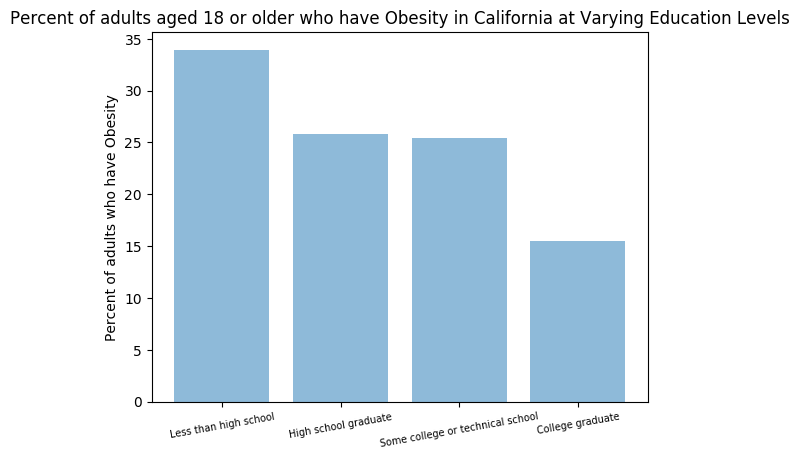

In [80]:
#The first step of data analysis will be showing that we can visualize the data in the dataframes that were made.
#We will make three barplots and a scatterplot illustrating how the data is different for varying demographics and behaviors.

#In order to make the barplots we first need to aggregate the data into two python lists that will serve as data on each axis of the barplot

#The first plot we will make will be a barplot showing the rate of obesity in California at various education levels.

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
array=table_california.Education.unique()
array=array.tolist()
del array[0]
array

obesity_less=[100*(.329*1870+0.348*1578+.343*1258+0.342*902)/(1870+1578+1258+902)]
obesity_hs=[100*(0.264*3146+0.264*2568+0.245*2142+0.25*1484+0.262*2263)/(3146+2568+2142+1484+2263)]
obesity_some_college=[100*(0.24*5375+0.263*3620+0.264*2872+0.261*2104+0.253*3031)/(5375+3620+2872+2104+3031)]
obesity_college=[100*(0.153*6681+0.16*5869+0.143*4382+0.172*3509+0.151*4752)/(6681+5869+4382+3509+4752)]

weight=(obesity_less+obesity_hs+obesity_some_college+obesity_college)
weight

y_pos = np.arange(len(array))

 
plt.bar(y_pos, weight, align='center', alpha=0.5)
plt.xticks(y_pos, array)
plt.xticks(fontsize=7, rotation=10)


plt.ylabel('Percent of adults who have Obesity')
plt.title('Percent of adults aged 18 or older who have Obesity in California at Varying Education Levels')
 
plt.show()

#As we can see by looking at the barplot, obesity rates go down as education level increases.  
#College graduates compared to less than high school have less than half the rate of obesity in the population.
#In addition, the rate of obesity gradually decreases as education increases; there is not much of a difference between high school graduates and some college individuals.


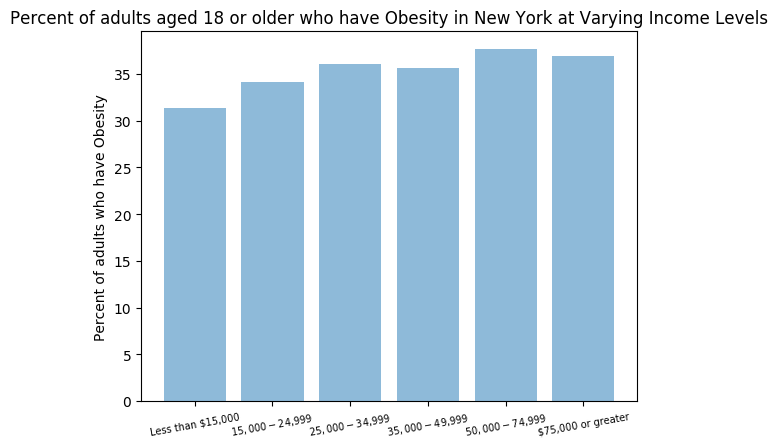

In [86]:
#We will now make a barplot showing the rate of obesity in New York at vary income levels

array=table_california.Income.unique()
array=array.tolist()
del array[0]
del array[6]
array

obesity_less15=[100*(0.344*797+592*0.332+952*0.321+0.281*667+1048*0.295)/(797+592+952+667+1048)]
obesity_25=[100*(0.333*1114+0.372*839+0.346*1278+0.318*951+0.341*1611)/(1114+839+1278+951+1611)]
obesity_35=[100*(0.346*647+0.368*501+0.379*756+0.372*529+0.344*957)/(647+501+756+529+957)]
obesity_49=[100*(.33*842+680*0.362+0.382*957+0.346*722+1159*0.357)/(842+680+957+722+1159)]
obesity_75=[100*(.382*926+0.41*762+0.39*975+0.364*784+0.354*1471)/(926+762+975+784+1471)]
obesity_max=[100*(0.371*1940+1591*0.376+0.378*2397+0.35*1893+0.371*3557)/(1940+1591+2397+1893+3557)]
weight=(obesity_less15+obesity_25+obesity_35+obesity_49+obesity_75+obesity_max)
weight

y_pos = np.arange(len(array))

 
plt.bar(y_pos, weight, align='center', alpha=0.5)
plt.xticks(y_pos, array)
plt.xticks(fontsize=7, rotation=10)


plt.ylabel('Percent of adults who have Obesity')
plt.title('Percent of adults aged 18 or older who have Obesity in New York at Varying Income Levels')
 
plt.show()

#The obesity rates at the various income levels all fall in a range between 30 and 40 percent.
#Obesity rates tend to gradually increase and income rises.


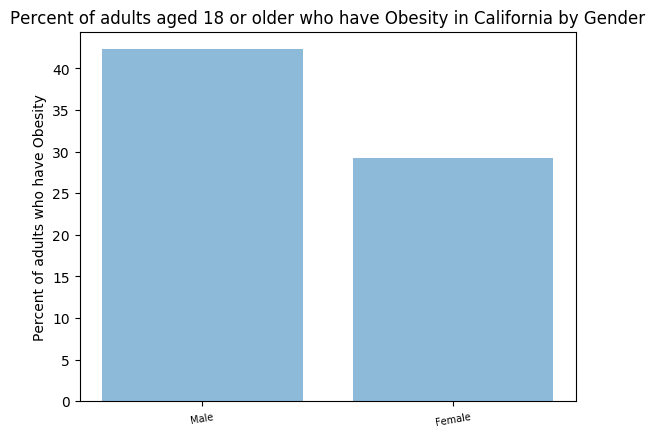

In [87]:
#We will now make a barplot showing the rate of obesity by gender in California 

array=table_california.Gender.unique()
array=array.tolist()
del array[1]
array

obesity_male=[100*(0.441*7159+0.408*5952+0.422*4828+0.422*3932+0.418*5741)/(7159+5952+4828+3932+5741)]
obesity_female=[100*(0.285*9929+0.298*7694+0.297*5841+0.276*4093+0.302*5718)/(9929+7694+5841+4093+5718)]
weight=(obesity_male+obesity_female)
weight

y_pos = np.arange(len(array))

 
plt.bar(y_pos, weight, align='center', alpha=0.5)
plt.xticks(y_pos, array)
plt.xticks(fontsize=7, rotation=10)


plt.ylabel('Percent of adults who have Obesity')
plt.title('Percent of adults aged 18 or older who have Obesity in California by Gender')
 
plt.show()

#The rate of obesity in California is significantly larger for males than it is for females
#The rate of obesity for males is 43 percent while it is only 29 percent in females.


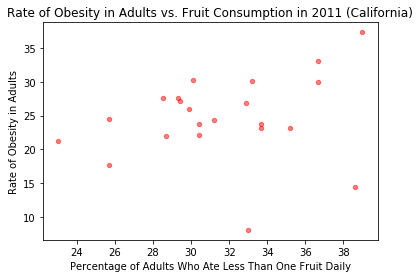

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Create data
N = 500
x = (30.4, 28.5, 38.6, 33.7, 29.9, 29.3, 23, 35.2, 25.7, 36.7, 33.2, 29.4, 30.4, 31.2, 25.7, 28.7, 36.7, 30.1, 33, 33.7, 39, 32.9)
y = (23.8, 27.6, 14.5, 23.7, 25.9, 27.6, 21.2, 23.1, 24.5, 29.9, 30.1, 27.2, 22.1, 24.3, 17.7, 22, 33.1, 30.3, 8.1, 23.2, 37.3, 26.9)
len(y)

colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Fruit Consumption in 2011 (California)')
plt.xlabel('Percentage of Adults Who Ate Less Than One Fruit Daily')
plt.ylabel('Rate of Obesity in Adults')


#We are now making a scatter plot that illustrates the relationship between fruit consumption and rates of obesity.

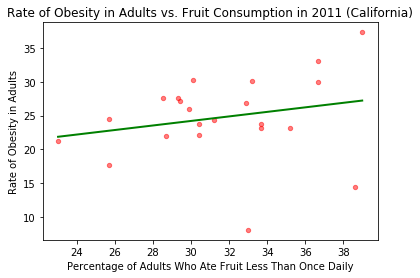

In [55]:
#On the basis of this data, how can we predict the rate of obesity in adults given an individual adult's fruit consumption?

#This general question might lead you to more specific questions:

#Is there a relationship between fruit consumption and obesity?
#How strong is that relationship?
#What is the effect of fruit consumption on obesity?
#Given fruit consumption in a particular market, can obesity rates be predicted?
#We will explore these questions below!

#Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

#y = beta_0 + beta_1*x

#What does each term represent?

#y is the response
#x is the feature
#beta_0 is the intercept
#beta_1 is the coefficient for x
#Together, beta_0 and beta_1 are called the model coefficients. To create your model, you must "learn" the values of these coefficients. 

#Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

x = (30.4, 28.5, 38.6, 33.7, 29.9, 29.3, 23, 35.2, 25.7, 36.7, 33.2, 29.4, 30.4, 31.2, 25.7, 28.7, 36.7, 30.1, 33, 33.7, 39, 32.9)
y = (23.8, 27.6, 14.5, 23.7, 25.9, 27.6, 21.2, 23.1, 24.5, 29.9, 30.1, 27.2, 22.1, 24.3, 17.7, 22, 33.1, 30.3, 8.1, 23.2, 37.3, 26.9)

data = pd.DataFrame(
    {'x': x,
     'y': y,
    })

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

#The regression line is:
#y=0.334434x+14.166743

#We can predict the obesity rate at 50% fruit consumption, a machine learning technique, by plugging in the value into the linear regression model.

#The obesity rate is predicted to be 30.88% at a 50% fruit consumption rate.

X_new = pd.DataFrame({'x': [data.x.min(), data.x.max()]})
X_new.head()

preds = lm.predict(X_new)
preds


# first, plot the observed data
colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Fruit Consumption in 2011 (California)')
plt.xlabel('Percentage of Adults Who Ate Fruit Less Than Once Daily')
plt.ylabel('Rate of Obesity in Adults')


# then, plot the least squares line
plt.plot(X_new, preds, c='green', linewidth=2)

plt.show()

In [34]:
lm.conf_int()
#Statsmodels calculates 95% confidence intervals for a model's coefficients, which leads to the following intepretation: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true". coefficient.

#null hypothesis: There is no relationship between fruit consumption and obesity (and thus beta_1 equals zero)
#alternative hypothesis: There is a relationship between fruit consumption and obesity (and thus beta_1 is not equal to zero)

lm.pvalues

#A p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

#In this case, the p-value for fruit consumption is far greater than 0.05, and so we believe that there is not a relationship between fruit consumption and obesity rates

lm.rsquared

#R2 is a statistic that will give some information about the fit of a model. In regression, the R^2 coefficient of determination is a statistical measure of how well the regression line approximates the real data points. An R2 of 1 indicates that the regression line perfectly fits the data.
#As we can see the R^2 value is 0.05 which is very far from 1, we can conclude the regression line does not fit the data well. 

0.050346082698648487

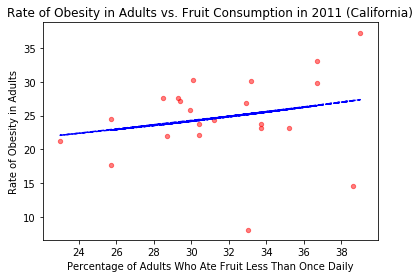

In [54]:
#We can now try a non linear regression of the second order to see if this is a better fit


from scipy.interpolate import *
import matplotlib.pyplot as plt
%matplotlib inline

p2 = polyfit(x,y,2)
p2

#The coefficients for the x^2 term is very close to zero and therefore shows the x^2 is not very influential in this model.
#The x^2 term is 3.80645e-03.

plot(x,polyval(p2,x), 'b--')
# first, plot the observed data
colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Fruit Consumption in 2011 (California)')
plt.xlabel('Percentage of Adults Who Ate Fruit Less Than Once Daily')
plt.ylabel('Rate of Obesity in Adults')


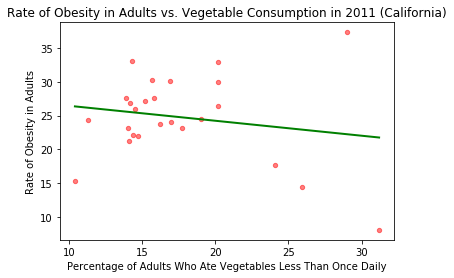

In [26]:

#An important question in the study of obesity is what is the biggest indicator for the condition?  In other words,
#which activity can someone do that will be a good predictor for whether someone will have obesity.  In order to do 
#this, we need to graph percentage of time individuals got obese vs. the percentage of time they did a certain activity.
#Based on the best fit line and the R^2 value of the data we can determine which activity is the best predictor for obesity.
#We neeed to make five more graphs.



y=[14.5, 23.7, 25.9, 27.6, 27.6, 21.2, 15.3, 26.4, 32.9, 24, 23.1, 24.5, 29.9, 30.1, 27.2, 22.1, 24.3, 17.7, 22, 33.1, 30.3, 8.1, 23.2, 37.3, 26.9]
vegetable=[25.9, 16.2, 14.5, 15.8, 13.9, 14.1, 10.4, 20.2, 20.2, 17, 14, 19, 20.2, 16.9, 15.2, 14.4, 11.3, 24.1, 14.7, 14.3, 15.7, 31.2, 17.7, 29, 14.2]
no_leisure=[13.6, 18.7, 19, 18.2, 21.5, 23.5, 32, 21.7, 15.6, 12.1, 18.1, 20.1, 28.2, 25.3, 21.4, 20, 16.9, 10.6, 14.6, 22.9, 25.6, 18.2, 19.1, 21.3, 10.8]
twoday_weights=[48.1, 35, 30.3, 29.2, 26.7, 25.1, 36.7, 31.6, 19, 36.2, 26.3, 37.9, 26.7, 24.4, 29.7, 30.7, 32.5, 40, 43.1, 36.8, 30.8, 48, 27.1, 33.1, 35.2]
mod_300=[39.6, 28.1, 29.7, 36.3, 39.2, 47.6, 26.8, 34.3, 39.6, 39.9, 34.9, 37.4, 30, 30.1, 37.6, 37.6, 36.5, 40.9, 39.9, 50.6, 29.3, 38.3, 29.1, 33.3, 43.2]
mod_150=[61.5, 52.2, 54.6, 59.3, 59.4, 64.3, 66.2, 55, 44.6, 61.5, 57.5, 58.9, 50.2, 57.9, 56.6, 60.4, 66.8, 48.6, 66, 65.3, 53.1, 59.4, 49.9, 56.4, 65.3]


#Graph #1

import pandas as pd
import numpy as np

data = pd.DataFrame(
    {'x': vegetable,
     'y': y,
    })

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

#The regression line is:
#y=-0.221077x+28.647833


X_new = pd.DataFrame({'x': [data.x.min(), data.x.max()]})
X_new.head()

preds = lm.predict(X_new)
preds


# first, plot the observed data
colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(vegetable, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Vegetable Consumption in 2011 (California)')
plt.xlabel('Percentage of Adults Who Ate Vegetables Less Than Once Daily')
plt.ylabel('Rate of Obesity in Adults')


# then, plot the least squares line
plt.plot(X_new, preds, c='green', linewidth=2)

plt.show()

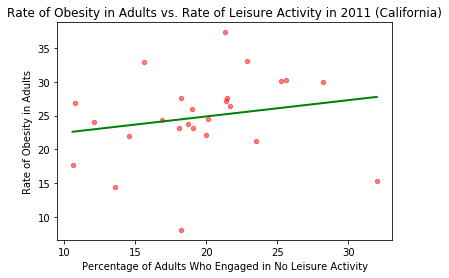

In [27]:
import pandas as pd
import numpy as np

#Graph #2

data = pd.DataFrame(
    {'x': no_leisure,
     'y': y,
    })

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

#The regression line is:
#Intercept    20.046704
#x             0.240762
#dtype: float64


X_new = pd.DataFrame({'x': [data.x.min(), data.x.max()]})
X_new.head()

preds = lm.predict(X_new)
preds


# first, plot the observed data
colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(no_leisure, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Rate of Leisure Activity in 2011 (California)')
plt.xlabel('Percentage of Adults Who Engaged in No Leisure Activity')
plt.ylabel('Rate of Obesity in Adults')


# then, plot the least squares line
plt.plot(X_new, preds, c='green', linewidth=2)

plt.show()

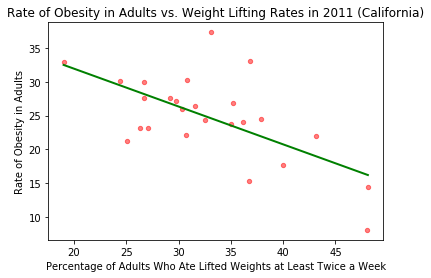

In [28]:
import pandas as pd
import numpy as np

#Graph #3

data = pd.DataFrame(
    {'x': twoday_weights,
     'y': y,
    })

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

#The regression line is:
#Intercept    43.103217
#x            -0.559230
#dtype: float64


X_new = pd.DataFrame({'x': [data.x.min(), data.x.max()]})
X_new.head()

preds = lm.predict(X_new)
preds


# first, plot the observed data
colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(twoday_weights, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Lifted Weight Rates in 2011 (California)')
plt.xlabel('Percentage of Adults Who Ate Lifted Weights at Least Twice a Week')
plt.ylabel('Rate of Obesity in Adults')


# then, plot the least squares line
plt.plot(X_new, preds, c='green', linewidth=2)

plt.show()

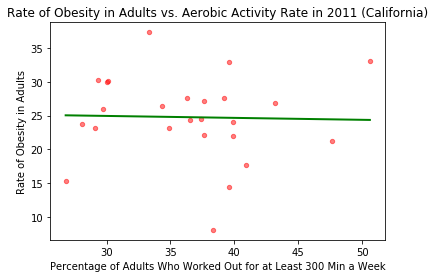

In [29]:
import pandas as pd
import numpy as np

#Graph #4

data = pd.DataFrame(
    {'x': mod_300,
     'y': y,
    })

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

#The regression line is:
#Intercept    25.798913
#x            -0.028658
#dtype: float64


X_new = pd.DataFrame({'x': [data.x.min(), data.x.max()]})
X_new.head()

preds = lm.predict(X_new)
preds


# first, plot the observed data
colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(mod_300, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Aerobic Activity Rate in 2011 (California)')
plt.xlabel('Percentage of Adults Who Worked Out for at Least 300 Min a Week')
plt.ylabel('Rate of Obesity in Adults')


# then, plot the least squares line
plt.plot(X_new, preds, c='green', linewidth=2)

plt.show()

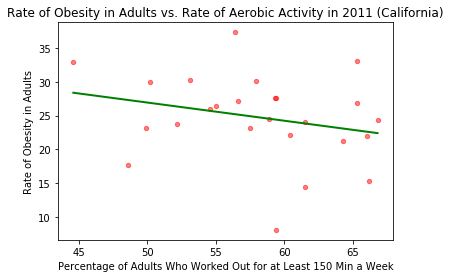

In [31]:
import pandas as pd
import numpy as np

data = pd.DataFrame(
    {'x': mod_150,
     'y': y,
    })

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

#The regression line is:
#Intercept    40.358387
#x            -0.268840
#dtype: float64


X_new = pd.DataFrame({'x': [data.x.min(), data.x.max()]})
X_new.head()

preds = lm.predict(X_new)
preds


# first, plot the observed data
colors = (1,0,0)
area = np.pi*6
 
# Plot
plt.scatter(mod_150, y, s=area, c=colors, alpha=0.5)
plt.title('Rate of Obesity in Adults vs. Rate of Aerobic Activity in 2011 (California)')
plt.xlabel('Percentage of Adults Who Worked Out for at Least 150 Min a Week')
plt.ylabel('Rate of Obesity in Adults')


# then, plot the least squares line
plt.plot(X_new, preds, c='green', linewidth=2)

plt.show()

In [32]:
#Based on the five graphs of obesity rates vs activities, the biggest reducer 
#for obesity is lifting weighst at least twice a week.  We get this information
#from looking at the best fit line for the obesity rate vs lifting weights graph
#and see this relationship has the slope with the largest absolute value.  This means whenever an weight lifting rate 
#is plugged into the best fit equation, a higher weight lifting rate than the rate plugged in will on average lead to the largest decrease in  
#obesity rates out of all of the all of the predictors. 

#This result is backed up by scientific research.  See the paper linked below that shows
#Physical inactivity in adolescence strongly predicted the risk of obesity (OR 3.9, 95%CI 1.4-10.9) and abdominal obesity (4.8, 1.9-12.0) at age 25, even after adjusting for baseline and current BMI. 


#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2249563/

#In this data analysis project, a data set was retrieved and cleaned so that it could be used for analysis and depiction.
#Once the data was cleaned, various bar plots were made to depict who the data set changes
#Then, scatter plots were made of obesity rates vs various rates of activities.
#The most influential behavior in obesity was found and a research paper was cited to back up the findings.
